# Deep Learning Intro

In [313]:
import warnings
warnings.filterwarnings('ignore')
# warnings.filterwarnings(action='once')

%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

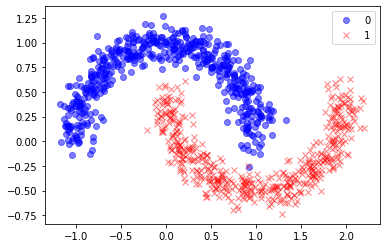

In [205]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [206]:
X.shape

(1000, 2)

In [207]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [209]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam

### Shallow Model

In [210]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [211]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [212]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 1ms/step


In [213]:
results

[0.3187509695688883, 0.8466666674613953]

In [214]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.847


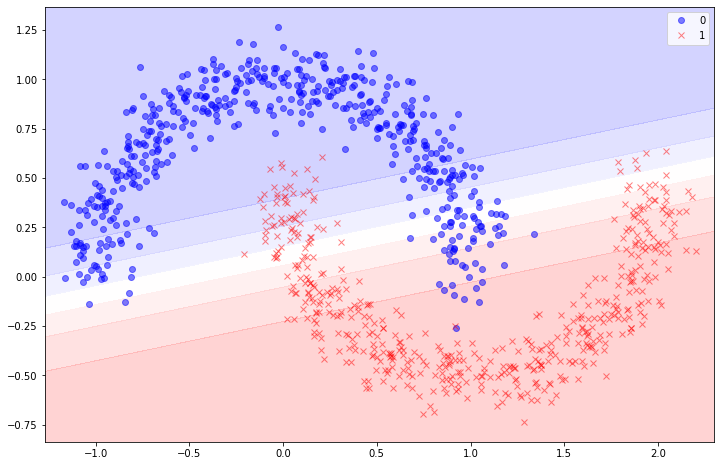

In [215]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [216]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh'))
model.add(Dense(2, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(Adam(lr=0.05), 'binary_crossentropy', metrics=['accuracy'])

In [217]:
model.fit(X_train, y_train, epochs=100, verbose=0)

In [218]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 2ms/step


[0.0014301537241165837, 1.0]

In [219]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [220]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


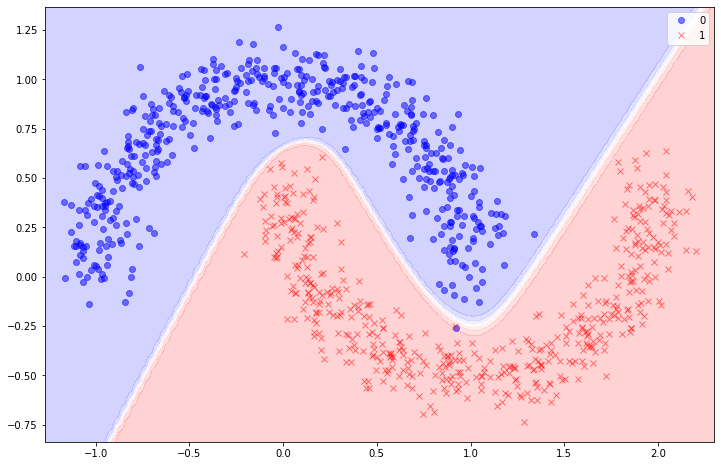

In [221]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [222]:
df = pd.read_csv('../data/iris.csv')

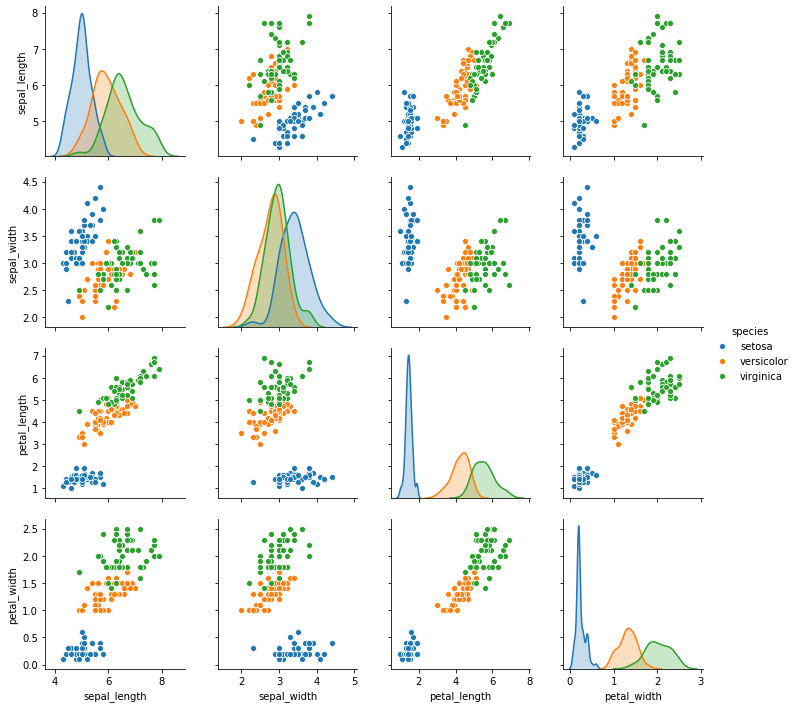

In [223]:
import seaborn as sns
sns.pairplot(df, hue="species")

In [224]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [225]:
X = df.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [226]:
target_names = df['species'].unique()
target_names

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [227]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [228]:
y= df['species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [229]:
from keras.utils.np_utils import to_categorical

In [230]:
y_cat = to_categorical(y)

In [231]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape

((120, 4), (30, 4), (120, 3))

In [233]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(lr=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [234]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Train on 108 samples, validate on 12 samples
Epoch 1/20
108/108 [==============================] - 2s 14ms/step - loss: 1.1950 - acc: 0.2963 - val_loss: 0.7342 - val_acc: 1.0000
Epoch 2/20
108/108 [==============================] - 0s 116us/step - loss: 0.9111 - acc: 0.6944 - val_loss: 0.5482 - val_acc: 0.7500
Epoch 3/20
108/108 [==============================] - 0s 111us/step - loss: 0.6638 - acc: 0.7222 - val_loss: 0.5987 - val_acc: 0.6667
Epoch 4/20
108/108 [==============================] - 0s 190us/step - loss: 0.5447 - acc: 0.7685 - val_loss: 0.4404 - val_acc: 0.7500
Epoch 5/20
108/108 [==============================] - 0s 169us/step - loss: 0.5683 - acc: 0.6389 - val_loss: 0.3595 - val_acc: 1.0000
Epoch 6/20
108/108 [==============================] - 0s 172us/step - loss: 0.4190 - acc: 0.9444 - val_loss: 0.3825 - val_acc: 0.7500
Epoch 7/20
108/108 [==============================] - 0s 174us/step - loss: 0.4255 - acc: 0.8056 - val_loss: 0.3292 - val_acc: 0.9167
Epoch 8/20
108/108

In [235]:
y_pred = model.predict(X_test)

In [236]:
y_pred[:5]

array([[2.1088244e-02, 7.9219908e-01, 1.8671264e-01],
       [1.2348917e-04, 2.4708067e-01, 7.5279582e-01],
       [1.9203078e-04, 2.2741801e-01, 7.7239001e-01],
       [7.4455992e-04, 4.3805659e-01, 5.6119883e-01],
       [9.8721862e-01, 1.2760574e-02, 2.0878129e-05]], dtype=float32)

In [237]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [238]:
from sklearn.metrics import classification_report

In [239]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00        12

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [240]:
confusion_matrix(y_test_class, y_pred_class)

array([[10,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 12]])

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

In [241]:
df = pd.read_csv('../data/diabetes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [242]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [243]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


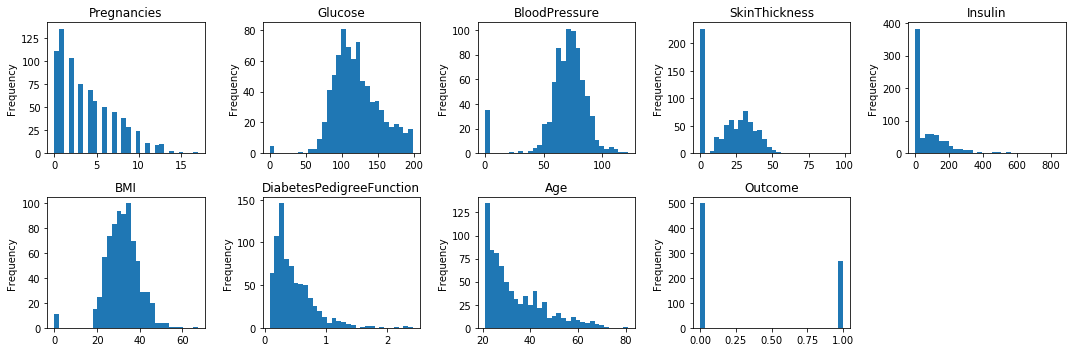

In [244]:
# plt.figure(figsize=(15, 5))

# for i, feature in enumerate(df.columns):
#     plt.subplot(1, len(df.columns), i+1)
#     df[feature].plot(kind='hist', title=feature)
#     plt.xlabel(feature)
# plt.tight_layout()

import math
import matplotlib.pyplot as plt
from matplotlib import gridspec

def do_plot(ax, feature_name):
    df[feature_name].plot(ax=ax,
        kind='hist',
        bins=30,
        title=feature_name)

N = len(df.columns)
cols = 5
rows = int(math.ceil(N / cols))

gs = gridspec.GridSpec(rows, cols)
fig = plt.figure(figsize=(15,5))
for n in range(N):
    ax = fig.add_subplot(gs[n])
    do_plot(ax, df.columns[n])

fig.tight_layout()

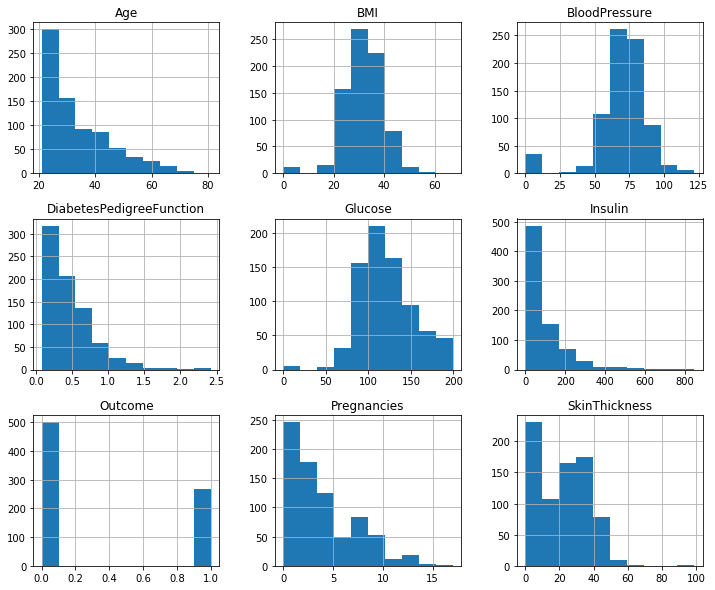

In [245]:
_ = df.hist(figsize=(12,10))

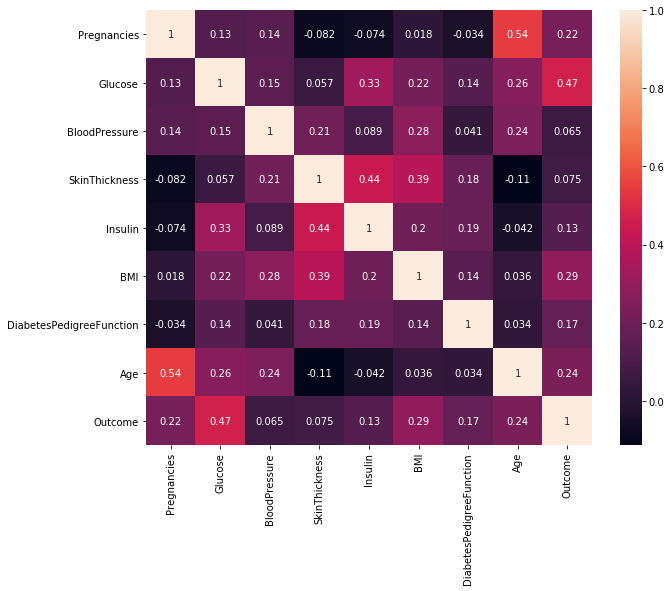

In [246]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True) 

/Users/tobias/miniconda3/envs/ztdl/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/tobias/miniconda3/envs/ztdl/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


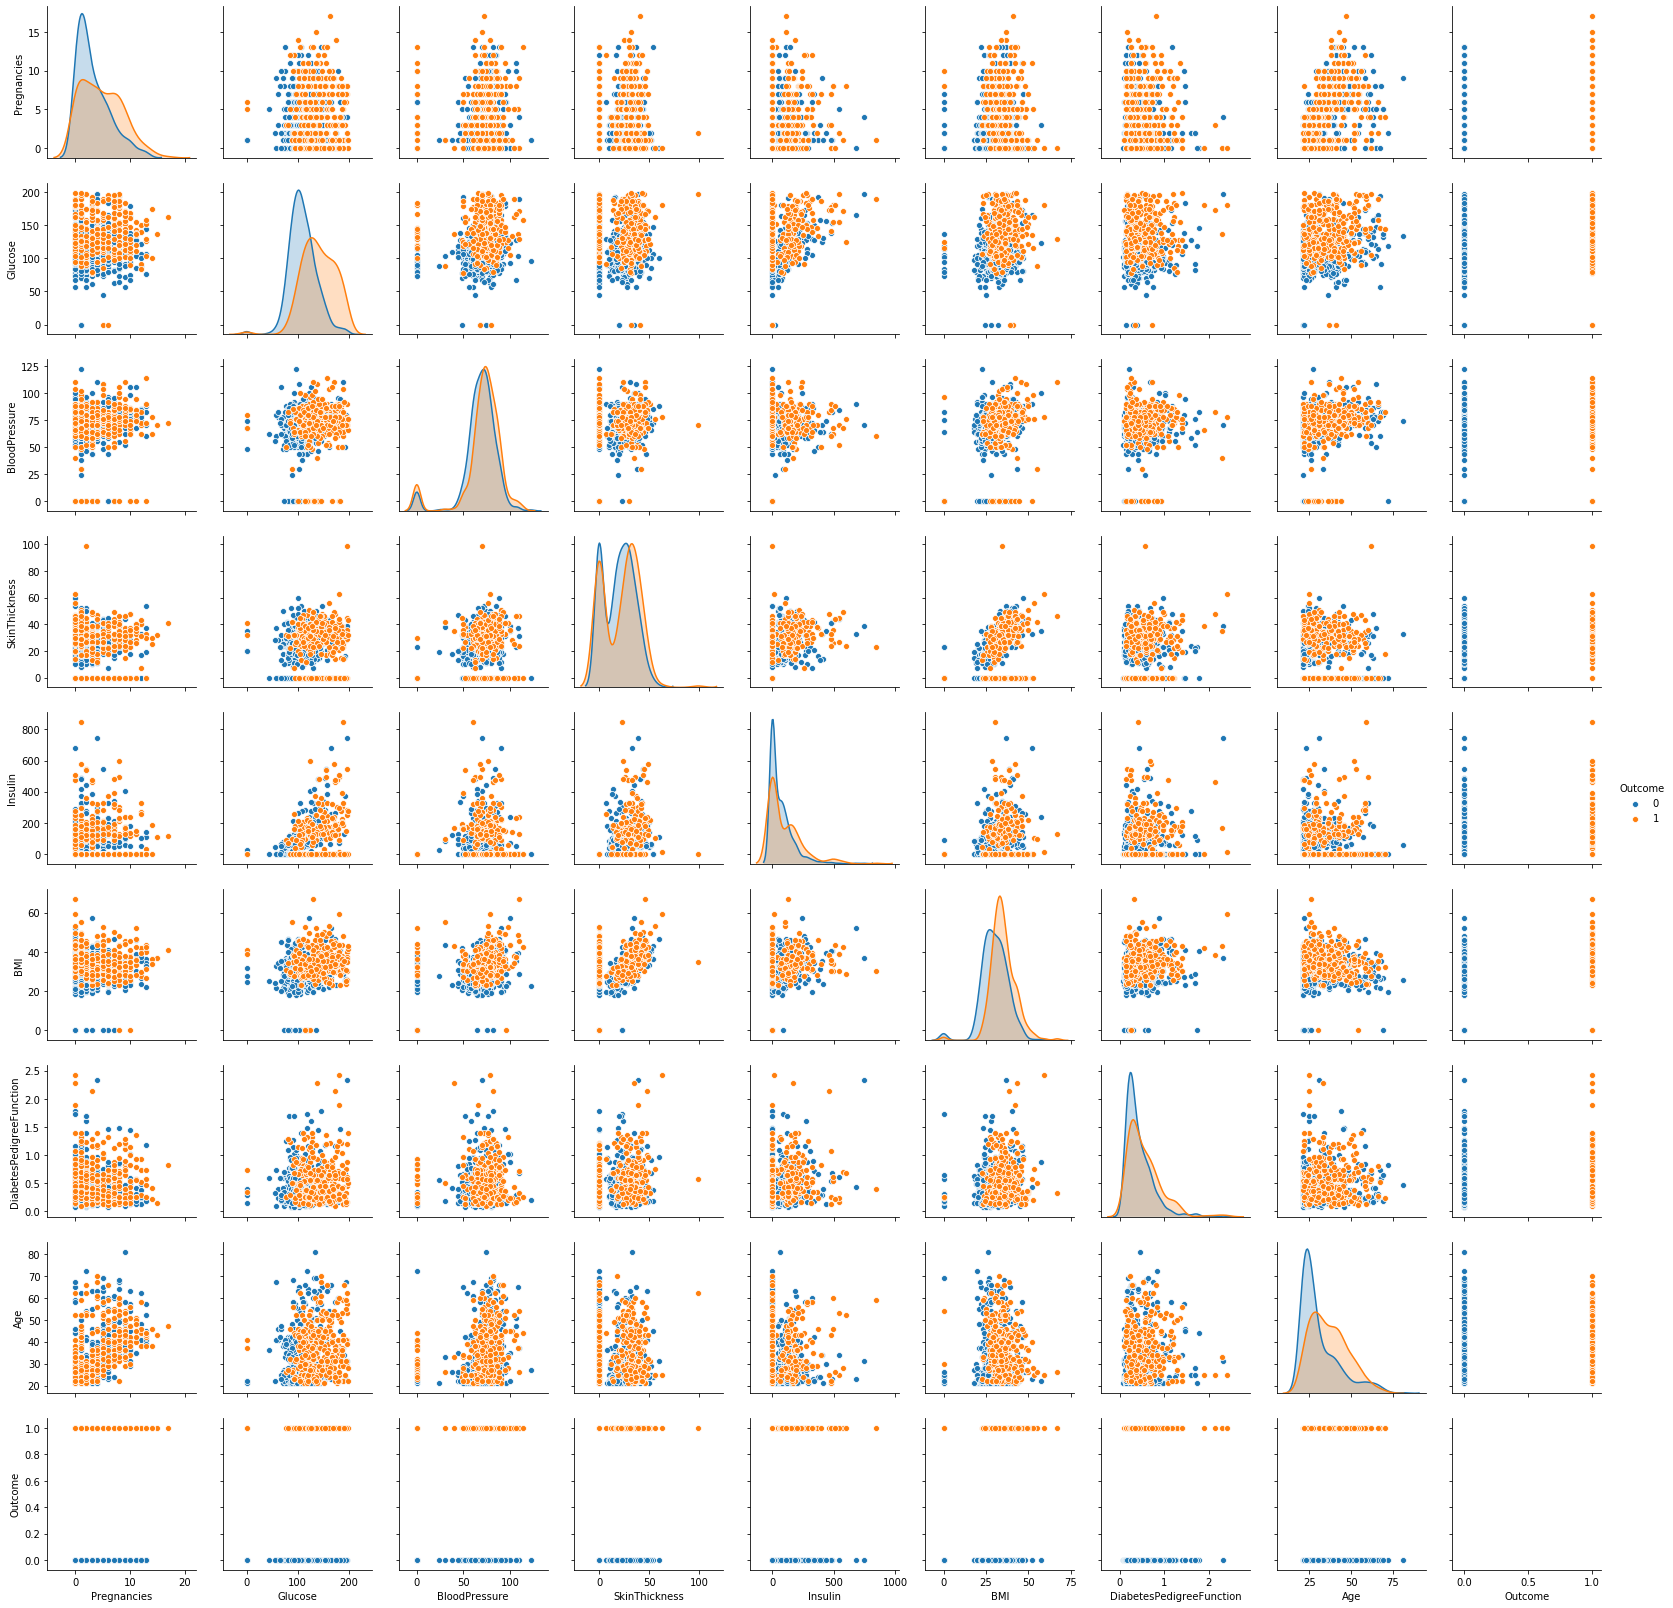

In [247]:
sns.pairplot(df, hue="Outcome")

In [248]:
df.shape

(768, 9)

In [249]:
from sklearn.preprocessing import StandardScaler 
from keras.utils import to_categorical

ss = StandardScaler()

dfs = pd.DataFrame(ss.fit_transform(df[df.columns[:-1]]), columns=df.columns[:-1])
# OR (not used in following)
X_scaled = ss.fit_transform(df.drop('Outcome', axis=1))
y_scaled = to_categorical(df['Outcome'].values)

dfs.head()
# y_scaled, df['Outcome'].values

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [250]:
X_scaled.shape, y_scaled.shape

((768, 8), (768, 2))

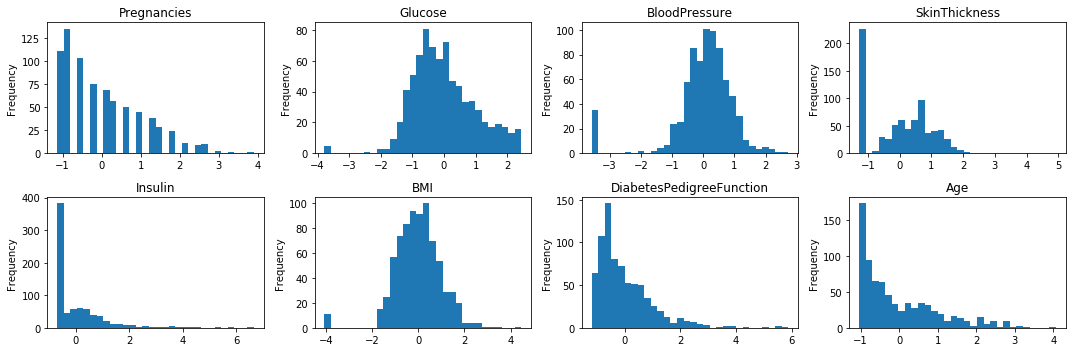

In [251]:
def create_hist_plots(df, cols=5, bins=30):

    def do_plot(df, ax, feature_name):
        df[feature_name].plot(ax=ax,
            kind='hist',
            bins=bins,
            title=feature_name)

    N = len(df.columns)
    cols = cols
    rows = int(math.ceil(N / cols))

    gs = gridspec.GridSpec(rows, cols)
    fig = plt.figure(figsize=(15,5))
    for n in range(N):
        ax = fig.add_subplot(gs[n])
        do_plot(dfs, ax, df.columns[n])

    fig.tight_layout()
    
create_hist_plots(dfs, cols=4)

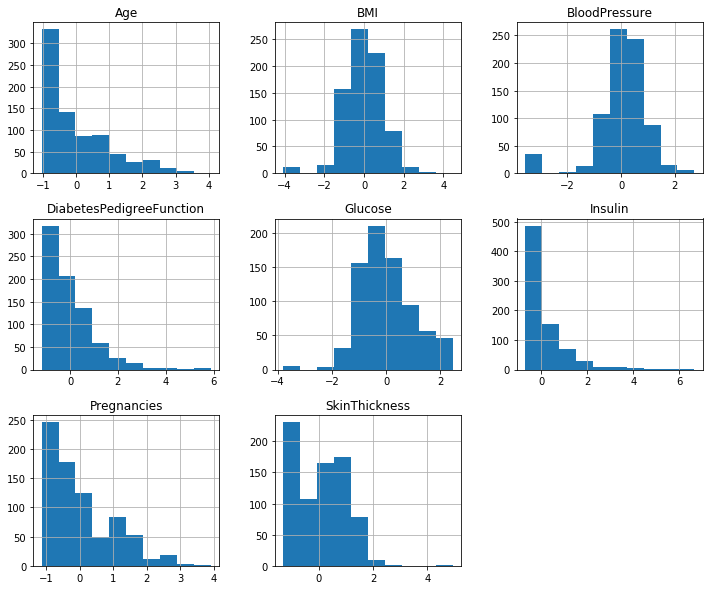

In [252]:
_ = dfs.hist(figsize=(12,10))

In [253]:
X = dfs.values
y = df['Outcome'].values

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

In [254]:
X.shape, y_scaled.shape

((768, 8), (768, 2))

In [255]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_scaled,
                                                    test_size=0.2,
                                                    random_state=22)
X_train.shape, X_test.shape, y_train.shape

((614, 8), (154, 8), (614, 2))

In [266]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

# model = Sequential([
#     Dense(32, input_shape=(8,)),
#     Activation('relu'),
#     Dense(32),
#     Activation('relu'),
#     Dense(1),
#     Activation('sigmoid')])

# model.compile(optimizer=Adam(lr=0.05),
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# # here we take only one column of the 'Outcome'-dummies 
# # and use binary / sigmoid classification
# model.fit(X_train, y_train[:,0], 
#           epochs=20,
#           verbose=2,
#           validation_split=0.1)


# # here we use softmax to align to the 2 column 'Outcome'-dummies
model = Sequential()
model.add(Dense(32, input_shape=(8,), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer=Adam(lr=0.05),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, 
          epochs=20,
          verbose=2,
          validation_split=0.1)

model.summary()

Train on 552 samples, validate on 62 samples
Epoch 1/20
 - 2s - loss: 0.6097 - acc: 0.6920 - val_loss: 0.5049 - val_acc: 0.7419
Epoch 2/20
 - 0s - loss: 0.4914 - acc: 0.7518 - val_loss: 0.5746 - val_acc: 0.7903
Epoch 3/20
 - 0s - loss: 0.4618 - acc: 0.7591 - val_loss: 0.5888 - val_acc: 0.7742
Epoch 4/20
 - 0s - loss: 0.4579 - acc: 0.7880 - val_loss: 0.5750 - val_acc: 0.7581
Epoch 5/20
 - 0s - loss: 0.4447 - acc: 0.7880 - val_loss: 0.5669 - val_acc: 0.8065
Epoch 6/20
 - 0s - loss: 0.4306 - acc: 0.8116 - val_loss: 0.6034 - val_acc: 0.7097
Epoch 7/20
 - 0s - loss: 0.4397 - acc: 0.7790 - val_loss: 0.5522 - val_acc: 0.8065
Epoch 8/20
 - 0s - loss: 0.4401 - acc: 0.7844 - val_loss: 0.5281 - val_acc: 0.7903
Epoch 9/20
 - 0s - loss: 0.4337 - acc: 0.7862 - val_loss: 0.5329 - val_acc: 0.7581
Epoch 10/20
 - 0s - loss: 0.4355 - acc: 0.7953 - val_loss: 0.5365 - val_acc: 0.7903
Epoch 11/20
 - 0s - loss: 0.4142 - acc: 0.7862 - val_loss: 0.5239 - val_acc: 0.7581
Epoch 12/20
 - 0s - loss: 0.3984 - acc: 

In [267]:
y_pred = model.predict(X_test)
y_pred

array([[1.12435870e-01, 8.87564123e-01],
       [9.99041021e-01, 9.58965858e-04],
       [5.70477962e-01, 4.29522008e-01],
       [6.09682679e-01, 3.90317380e-01],
       [6.33957684e-01, 3.66042316e-01],
       [6.72670841e-01, 3.27329099e-01],
       [9.99952555e-01, 4.74801891e-05],
       [9.42190468e-01, 5.78095727e-02],
       [6.81274116e-01, 3.18725884e-01],
       [9.99650359e-01, 3.49690410e-04],
       [6.07906103e-01, 3.92093956e-01],
       [6.87541127e-01, 3.12458843e-01],
       [6.09748960e-01, 3.90251040e-01],
       [1.35089949e-01, 8.64910066e-01],
       [6.22701228e-01, 3.77298772e-01],
       [4.45289254e-01, 5.54710746e-01],
       [1.00000000e+00, 2.41263596e-08],
       [6.07906103e-01, 3.92093956e-01],
       [6.07906103e-01, 3.92093956e-01],
       [9.58462358e-01, 4.15376723e-02],
       [9.95840967e-01, 4.15898394e-03],
       [6.07906103e-01, 3.92093956e-01],
       [6.14271879e-01, 3.85728121e-01],
       [1.24181397e-01, 8.75818610e-01],
       [9.912767

In [268]:
# when using sigmoid
# y_test_class = np.where(y_test[:,0] > 0.5, 1, 0)
# y_pred_class = np.where(y_pred[:,0] > 0.5, 1, 0)

# # when using softmax version
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [275]:
pd.Series(y_test_class).value_counts() / len(y_test_class) # benchmark of ~65%

0    0.649351
1    0.350649
dtype: float64

In [269]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy_score(y_test_class, y_pred_class) # only little better than benchmark

0.7012987012987013

In [270]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       0.71      0.90      0.80       100
           1       0.64      0.33      0.44        54

    accuracy                           0.70       154
   macro avg       0.68      0.62      0.62       154
weighted avg       0.69      0.70      0.67       154



In [271]:
confusion_matrix(y_test_class, y_pred_class) # lower left: false negative is quite high

array([[90, 10],
       [36, 18]])

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

In [279]:
dfs.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02,7.680000e+02
mean,-6.476301e-17,-9.251859e-18,1.503427e-17,1.006140e-16,-3.006854e-17,2.590520e-16,2.451743e-16,1.931325e-16
std,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00,1.000652e+00
min,-1.141852e+00,-3.783654e+00,-3.572597e+00,-1.288212e+00,-6.928906e-01,-4.060474e+00,-1.189553e+00,-1.041549e+00
25%,-8.448851e-01,-6.852363e-01,-3.673367e-01,-1.288212e+00,-6.928906e-01,-5.955785e-01,-6.889685e-01,-7.862862e-01
50%,-2.509521e-01,-1.218877e-01,1.496408e-01,1.545332e-01,-4.280622e-01,9.419788e-04,-3.001282e-01,-3.608474e-01
75%,6.399473e-01,6.057709e-01,5.632228e-01,7.190857e-01,4.120079e-01,5.847705e-01,4.662269e-01,6.602056e-01
max,3.906578e+00,2.444478e+00,2.734528e+00,4.921866e+00,6.652839e+00,4.455807e+00,5.883565e+00,4.063716e+00


In [298]:
from sklearn.feature_selection import SelectKBest, chi2

select_top_4 = SelectKBest(score_func=chi2, k=4)
top_4 = select_top_4.fit(df.iloc[:,:8], df.iloc[:,8])

df.columns[0:8][top_4.get_support()]

Index(['Glucose', 'Insulin', 'BMI', 'Age'], dtype='object')

In [300]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

models = []
models.append(("LR", LogisticRegression()))
models.append(("NB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DT", DecisionTreeClassifier()))
models.append(("SVM", SVC()))

In [305]:
X_train.shape, y_train.shape

((614, 8), (614, 2))

In [314]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=22)
    cv_result = cross_val_score(model, X_train, y_train[:,0],
                                cv=kfold, scoring='accuracy')
    names.append(name)
    results.append(cv_result)

for i in range(len(names)):
    print(names[i], results[i].mean())

LR 0.7865415124272872
NB 0.7668693812797461
KNN 0.7344526705446854
DT 0.7021681649920677
SVM 0.7702273929138023


[Text(0, 0, 'LR'),
 Text(0, 0, 'NB'),
 Text(0, 0, 'KNN'),
 Text(0, 0, 'DT'),
 Text(0, 0, 'SVM')]

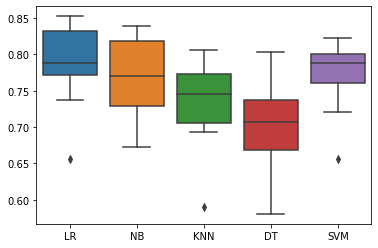

In [310]:
ax = sns.boxplot(data=results)
ax.set_xticklabels(names)

In [316]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

for mod in [RandomForestClassifier(), SVC(), GaussianNB()]:
    mod.fit(X_train, y_train[:,0])
    y_pred = mod.predict(X_test)
    
    print('='*80)
    print(mod)
    print('='*80)
    print("Accuracy score: {:0.3}".format(accuracy_score(y_test_class, y_pred_class)))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test_class, y_pred))
    print()

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Accuracy score: 0.701
Confusion Matrix:
[[15 85]
 [27 27]]

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)
Accuracy score: 0.701
Confusion Matrix:
[[11 89]
 [22 32]]

GaussianNB(priors=None, var_smoothing=1e-09)
Accuracy score: 0.701
Confusion Matrix:
[[13 87]
 [22 32]]



## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
